In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and clean data

In [2]:
df = pd.read_csv('../../../Data/Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [3]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

### Drop Alley column

In [4]:
df = df.drop(columns=['Alley'])

### Fill nans

In [5]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Lot Frontage                253
Year Garage                  63
Masonry/Veneer Area           8
Total Rooms Above Grade       0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Type                          0
Garage Finish                 0
Kitchens Above Grade          0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Kitchen Qual                  0
Garage Cars                   0
2nd Floor Area                0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence   

In [6]:
gb1 = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()

def fill_1(r):
    n = r.Nbhd
    
    x = r['Lot Frontage']
    
    if pd.isna(x):
        return gb1[n]
    else:
        return x
    # end
# end

df['Lot Frontage'] = df.apply(fill_1, axis=1)

In [7]:
gb2 = df.groupby(["Nbhd"])['Year Garage'].median().sort_values()

def fill_2(r):
    n = r.Nbhd
    
    x = r['Year Garage']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Year Garage'] = df.apply(fill_2, axis=1)

In [8]:
gb3 = df.groupby(["Nbhd"])['Masonry/Veneer Area'].median().sort_values()

def fill_3(r):
    n = r.Nbhd
    
    x = r['Masonry/Veneer Area']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Masonry/Veneer Area'] = df.apply(fill_3, axis=1)

In [9]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Type                          0
Kitchen Qual                  0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Total Rooms Above Grade       0
Kitchens Above Grade          0
1st Floor Area                0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Living Area Above Grade       0
Year Garage                   0
Garage Finish                 0
Garage Cars                   0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence                         0
Sale Typ

### Drop Masonry/Veneer column

In [10]:
df = df.drop(columns=['Masonry/Veneer'])

# Feature engineering

### Floors

In [11]:
def get_floors(x):
    if x > 0:
        return 2
    else:
        return 1
    # end
# end

df['Floors'] = df['2nd Floor Area'].apply(get_floors)

### Areas

In [12]:
df['Indoor Area'] = df[
    [
        '1st Floor Area', '2nd Floor Area', 'Basement Area'
    ]
].sum(axis=1)

df['Outdoor Area'] = df[
    [
        '3 Season Porch Area', 'Enclosed Porch Area', 'Garage Area',
        'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
].sum(axis=1)

df['Basement Finished Area Fraction'] = df['Basement Finished Area'] / df[['Basement Finished Area', 'Basement Unfinished Area']].sum(axis=1)
df['Basement Finished Area Fraction'] = df['Basement Finished Area Fraction'].fillna(0)

In [13]:
df = df.drop(
    columns=[
       '1st Floor Area', '2nd Floor Area', '3 Season Porch Area',
       'Basement Area', 'Basement Finished Area', 'Basement Unfinished Area',
       'Enclosed Porch Area', 'Garage Area', 'Living Area Above Grade',
       'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
)

### Label encode qualities

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Define known categories
quality_order = ["Poor", "Fair", "Average", "Good", "Excellent"]

# Identify categorical columns that contain 'Average'
cols = df.columns[df.isin(['Average']).any(axis=0)]

# Replace unknown values with "Poor"
df[cols] = df[cols].applymap(lambda x: x if x in quality_order else "Poor")

# Initialize and fit OrdinalEncoder on a single-column DataFrame
encoder = OrdinalEncoder(
    categories=[quality_order]
)

encoder.fit(
    np.array(quality_order)[:,np.newaxis]
)

# Transform each column separately in a loop
for c in cols:
    df[c] = encoder.transform(df[[c]]).astype(int)[:,0]
# end

In [15]:
df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x.split(" ")[0]
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x != "Typical" else "Average"
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Basement Height'] = encoder.transform(df[['Basement Height']]).astype(int)[:,0]

In [16]:
df['Pool Qual'] = df['Pool Qual'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Pool Qual'] = encoder.transform(df[['Pool Qual']]).astype(int)[:,0]

### Central Air

In [17]:
df['CentralAir'] = df['CentralAir'].replace(
    {
        'Y':1,
        'N':0
    }
)

df = df.rename(
    columns={
        'CentralAir':'Central Air'
    }
)

### Filter outliers

In [18]:
# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns

factor = 3

# Loop and filter directly
for col in num_cols:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR / 2
    upper = Q3 + factor * IQR / 1
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"Filtered shape: {df.shape}")

Filtered shape: (1322, 57)


### Split numeric and categorical columns

In [19]:
df_num = df.select_dtypes(exclude=object)
df_cat = df.select_dtypes(include=object)

### Scale numeric features

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize features (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(X_scaled, columns=df_num.columns, index=df_num.index)

# Clustering

## K-means / GMM (sweep through k values)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Range of clusters to try
k_range = np.arange(2, 20 + 1)

silhouette_scores_kmeans = []
silhouette_scores_gmm = []
aic_scores_gmm = []
bic_scores_gmm = []

for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(df_num_scaled)
    score_kmeans = silhouette_score(df_num_scaled, labels_kmeans)
    silhouette_scores_kmeans.append(score_kmeans)
    
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_num_scaled)
    labels_gmm = gmm.predict(df_num_scaled)
    score_gmm = silhouette_score(df_num_scaled, labels_gmm)
    silhouette_scores_gmm.append(score_gmm)
    aic_scores_gmm.append(gmm.aic(df_num_scaled))
    bic_scores_gmm.append(gmm.bic(df_num_scaled))

## Silhouette + AIC / BIC

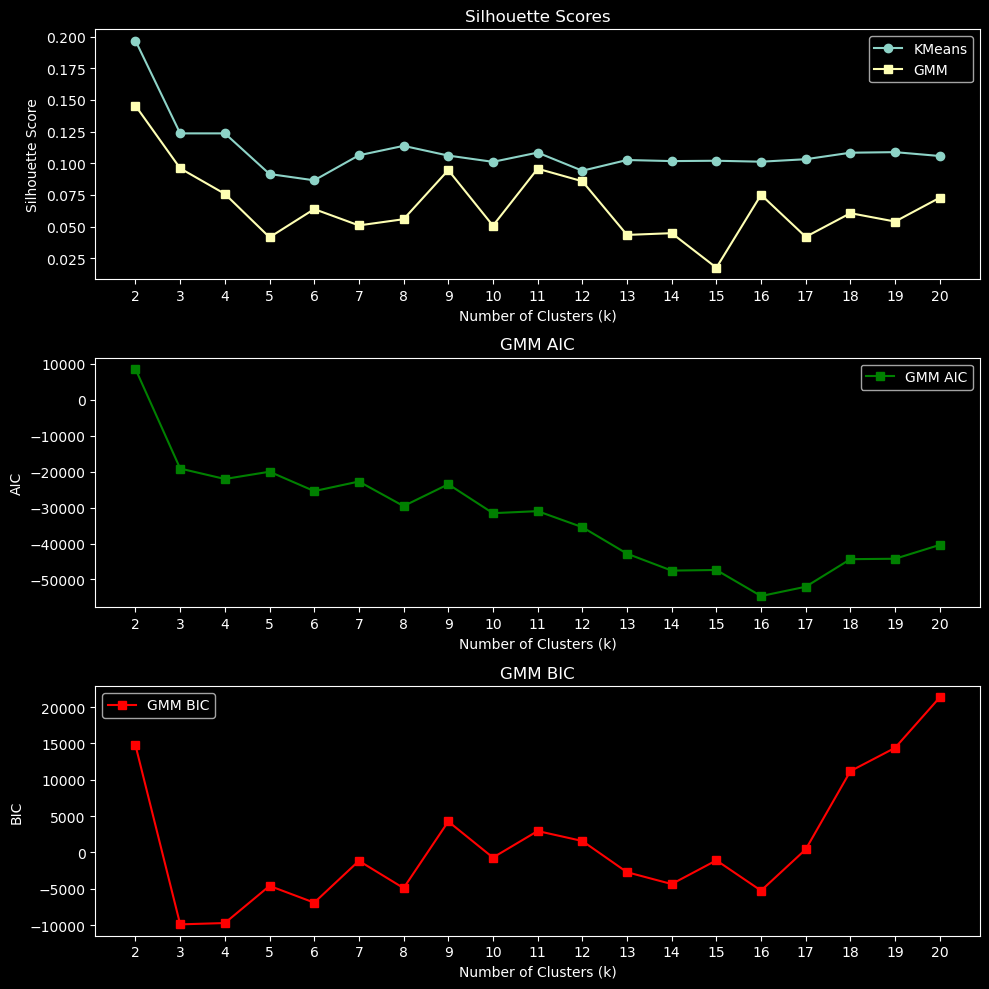

In [ ]:
# Plot all stacked vertically
plt.figure(figsize=(8, 8))

# Silhouette scores
plt.subplot(3, 1, 1)
plt.plot(k_range, silhouette_scores_kmeans, marker='o', label='KMeans')
plt.plot(k_range, silhouette_scores_gmm, marker='s', label='GMM')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.legend()

# AIC
plt.subplot(3, 1, 2)
plt.plot(k_range, aic_scores_gmm, marker='s', color='green', label='GMM AIC')
plt.title('GMM AIC')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('AIC')
plt.xticks(k_range)
plt.legend()

# BIC
plt.subplot(3, 1, 3)
plt.plot(k_range, bic_scores_gmm, marker='s', color='red', label='GMM BIC')
plt.title('GMM BIC')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('BIC')
plt.xticks(k_range)
plt.legend()

plt.tight_layout()
plt.show()

KMeans Cluster 0 mean silhouette: 0.255
KMeans Cluster 1 mean silhouette: 0.146


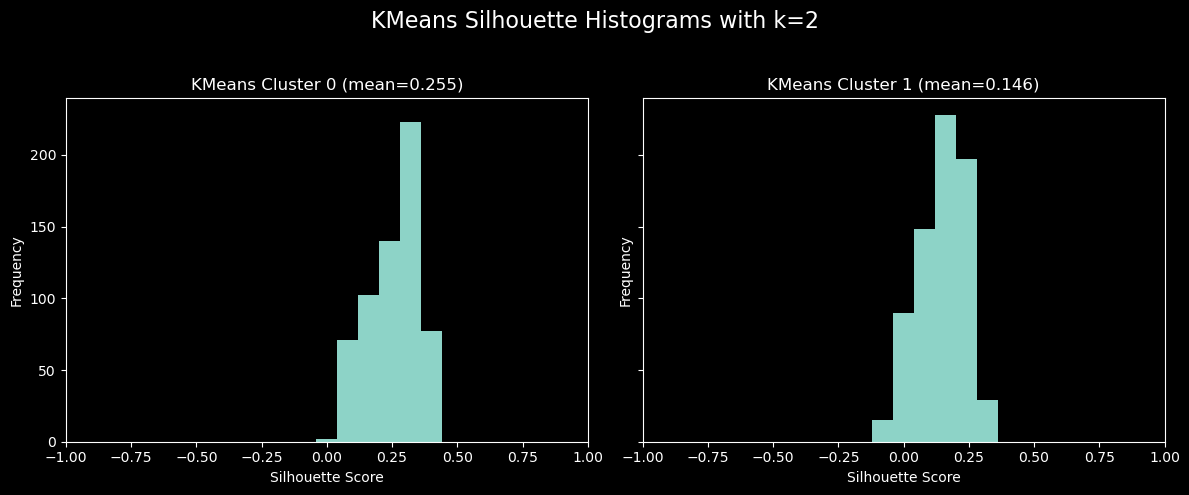

GMM Cluster 0 mean silhouette: 0.191
GMM Cluster 1 mean silhouette: -0.003


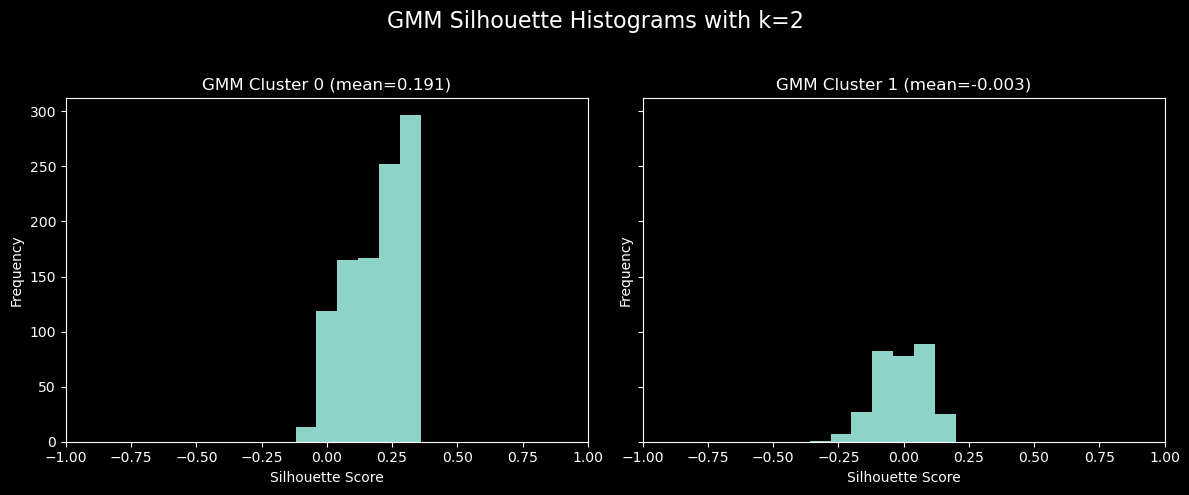

In [40]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters
n_clusters = 2

# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(df_num_scaled)

# Fit GMM with 2 components
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels_gmm = gmm.fit_predict(df_num_scaled)

# Compute silhouette samples
sil_vals_kmeans = silhouette_samples(df_num_scaled, labels_kmeans)
sil_vals_gmm = silhouette_samples(df_num_scaled, labels_gmm)

# === KMeans Histograms: side by side ===
fig, axes = plt.subplots(1, n_clusters, figsize=(6 * n_clusters, 5), sharey=True)

for i in range(n_clusters):
    ax = axes[i]
    cluster_sil_vals = sil_vals_kmeans[labels_kmeans == i]
    mean_sil = cluster_sil_vals.mean()
    print(f"KMeans Cluster {i} mean silhouette: {mean_sil:.3f}")
    ax.hist(cluster_sil_vals, bins=25, range=(-1, 1) )
    ax.set_xlim(-1, 1)
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'KMeans Cluster {i} (mean={mean_sil:.3f})')

plt.suptitle(f'KMeans Silhouette Histograms with k={n_clusters}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# === GMM Histograms: side by side ===
fig, axes = plt.subplots(1, n_clusters, figsize=(6 * n_clusters, 5), sharey=True)

for i in range(n_clusters):
    ax = axes[i]
    cluster_sil_vals = sil_vals_gmm[labels_gmm == i]
    mean_sil = cluster_sil_vals.mean()
    print(f"GMM Cluster {i} mean silhouette: {mean_sil:.3f}")
    ax.hist(cluster_sil_vals, bins=25, range=(-1, 1) )
    ax.set_xlim(-1, 1)
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'GMM Cluster {i} (mean={mean_sil:.3f})')

plt.suptitle(f'GMM Silhouette Histograms with k={n_clusters}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Crosstab

In [41]:
# Create a DataFrame to hold both sets of labels
df_labels = pd.DataFrame({
    'kmeans': labels_kmeans,
    'gmm': labels_gmm
}, index=df_num_scaled.index)

# Crosstab with margins (adds totals)
ct = pd.crosstab(df_labels['kmeans'], df_labels['gmm'], margins=True)
display(ct)

gmm,0,1,All
kmeans,,,
0,591,24,615
1,422,285,707
All,1013,309,1322


### Check Adjusted Rand Index and Mutual Info

Both range from $[-1,1]$ (like silhouette) with closer to 1 being more clustering agreement.

In [23]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Example: compare KMeans and GMM
ari = adjusted_rand_score(labels_kmeans, labels_gmm)
ami = adjusted_mutual_info_score(labels_kmeans, labels_gmm)

print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")

ARI: 0.104
AMI: 0.172


### Check clustering against numerical feature distributions

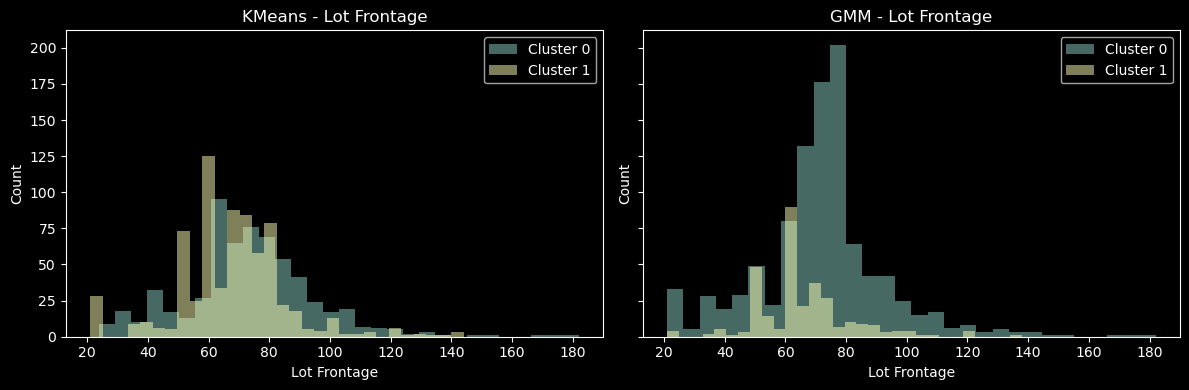

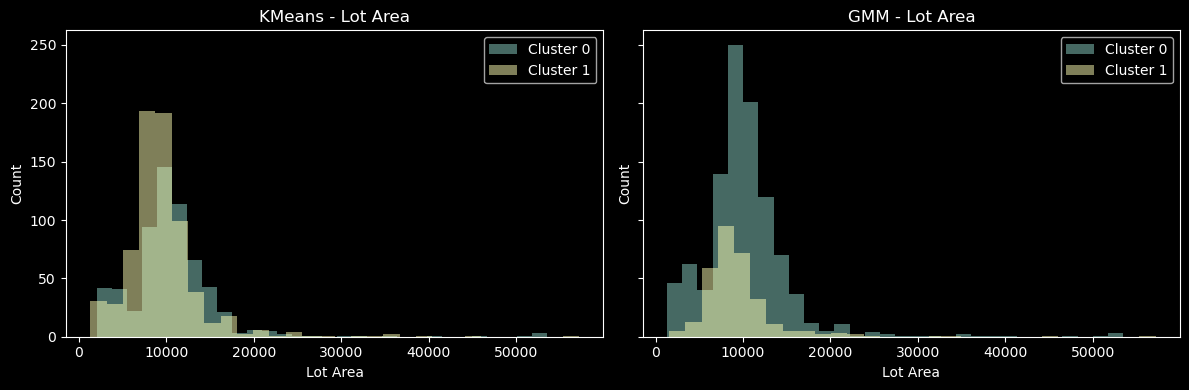

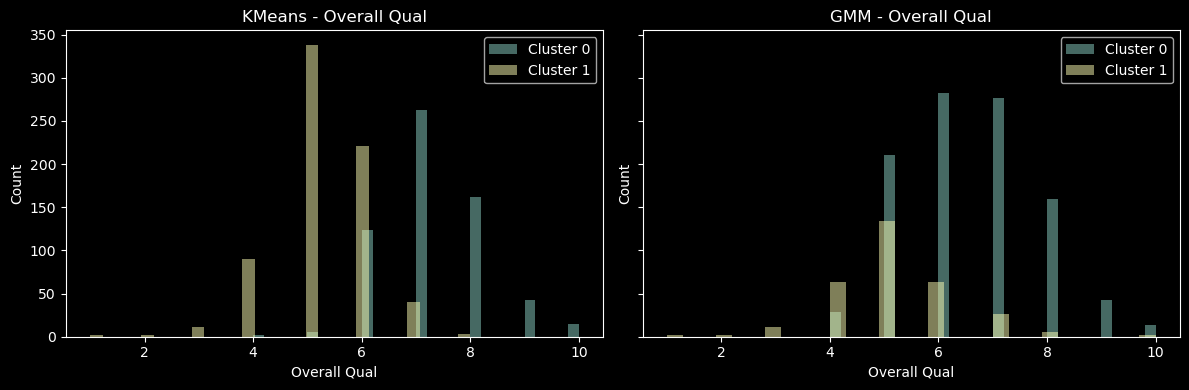

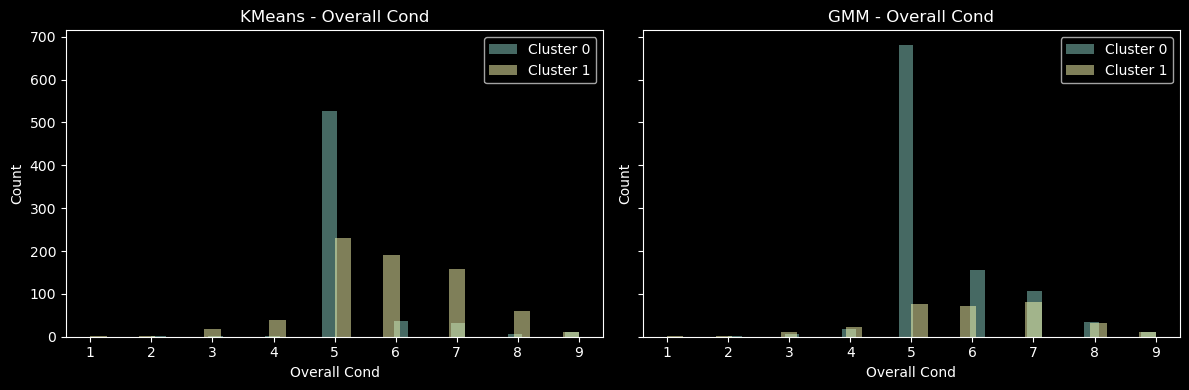

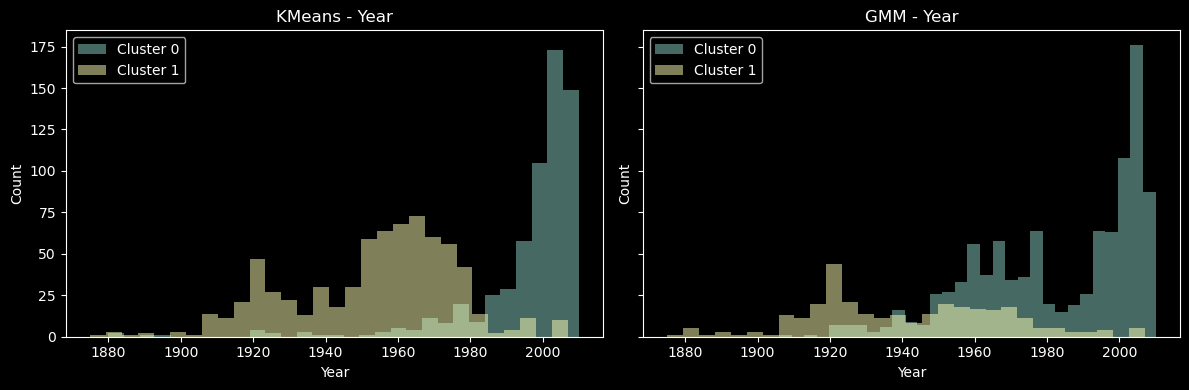

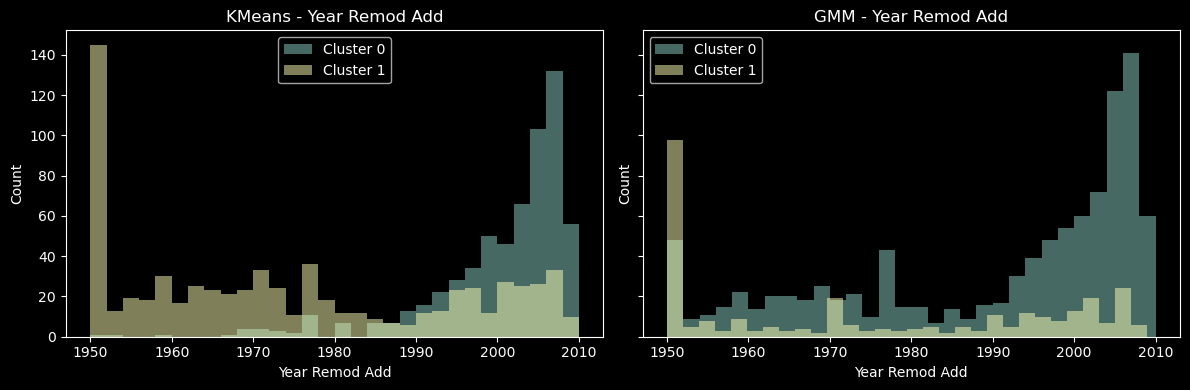

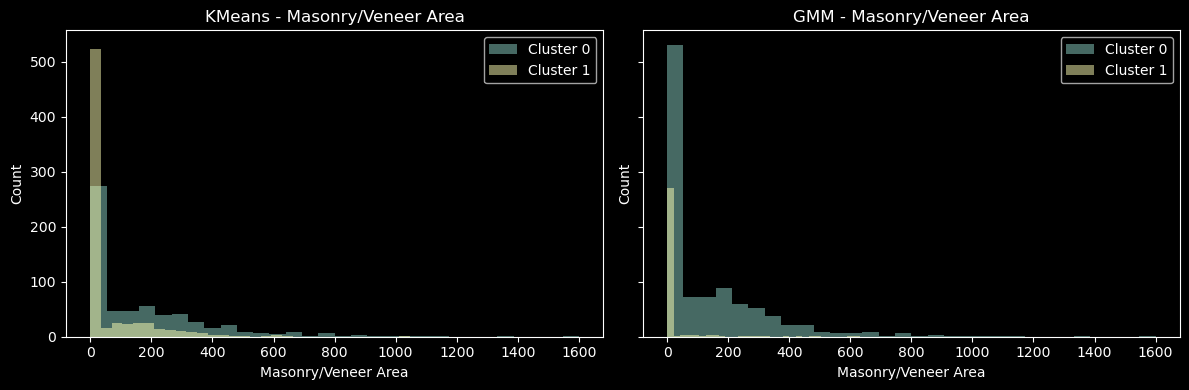

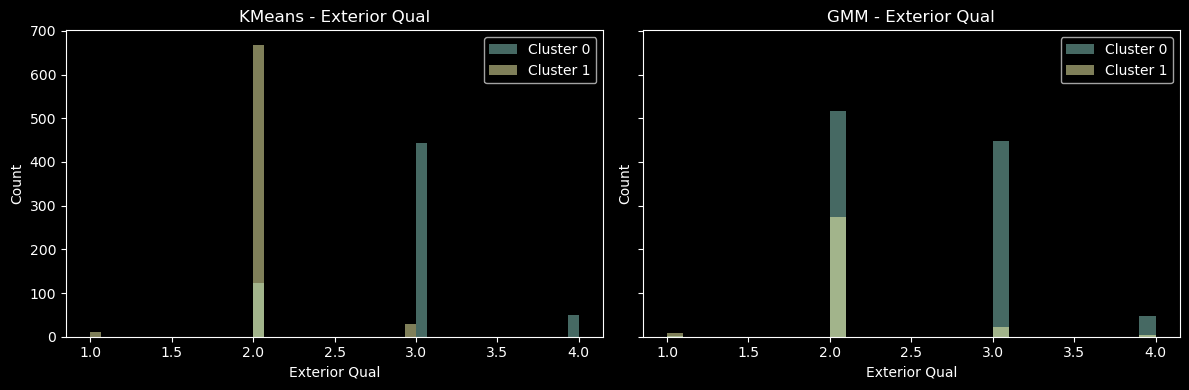

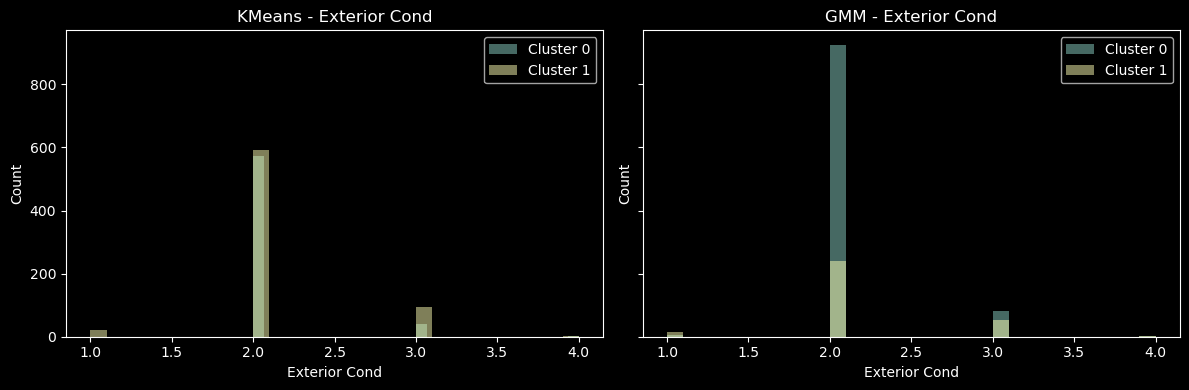

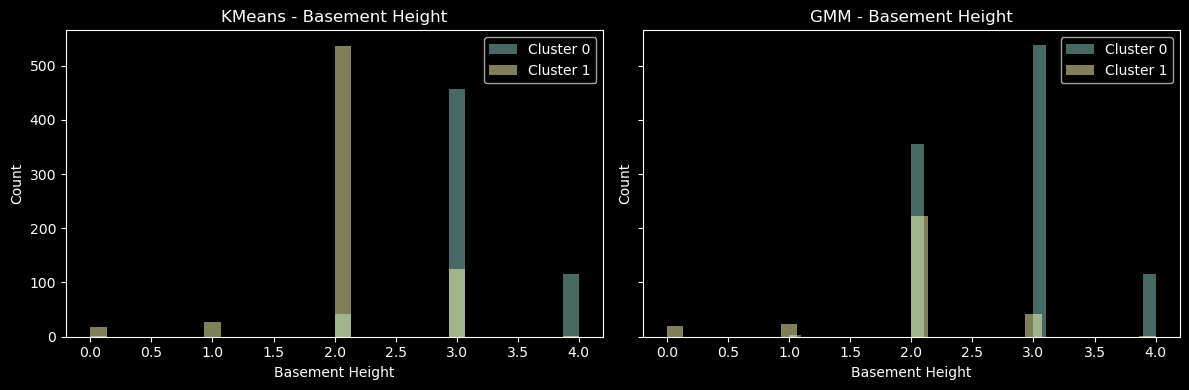

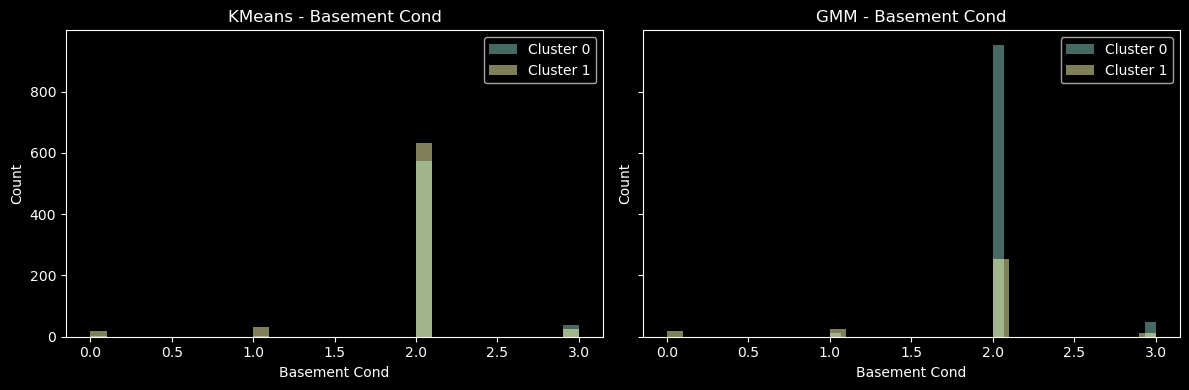

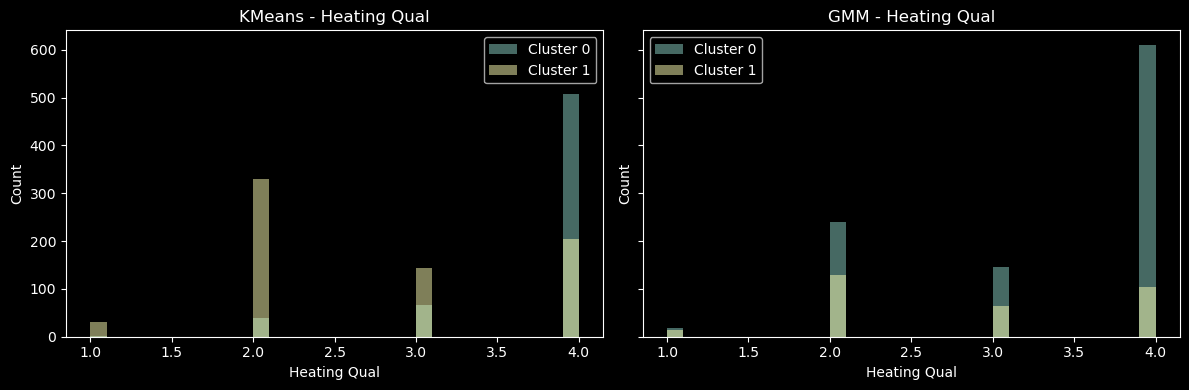

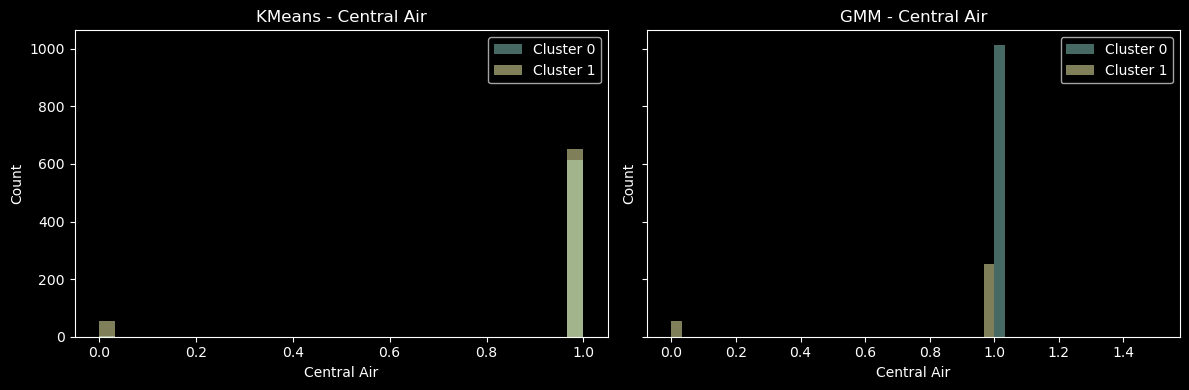

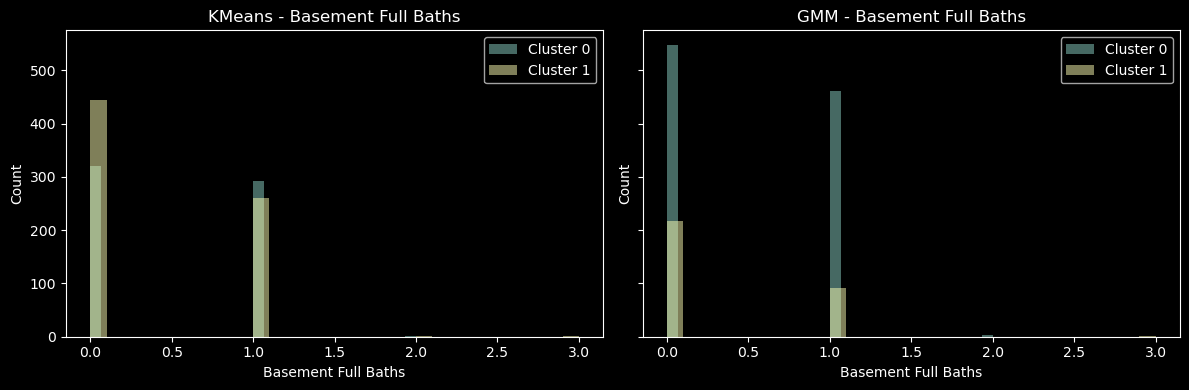

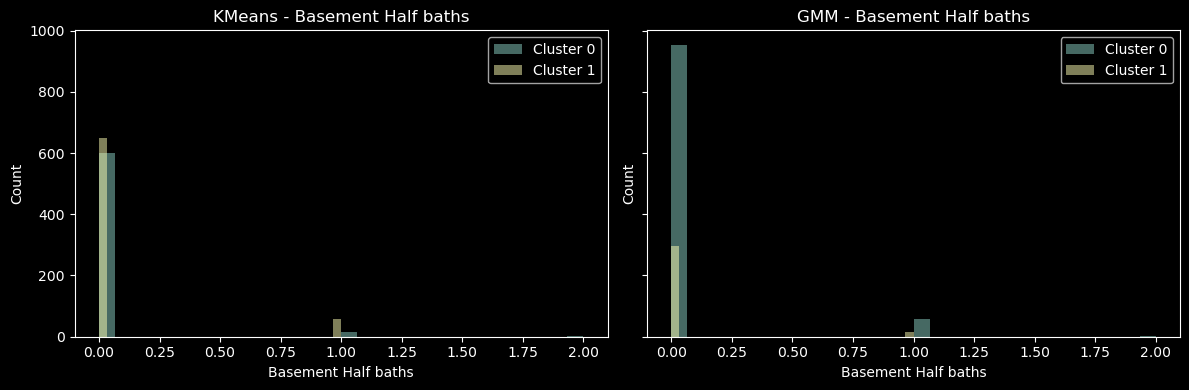

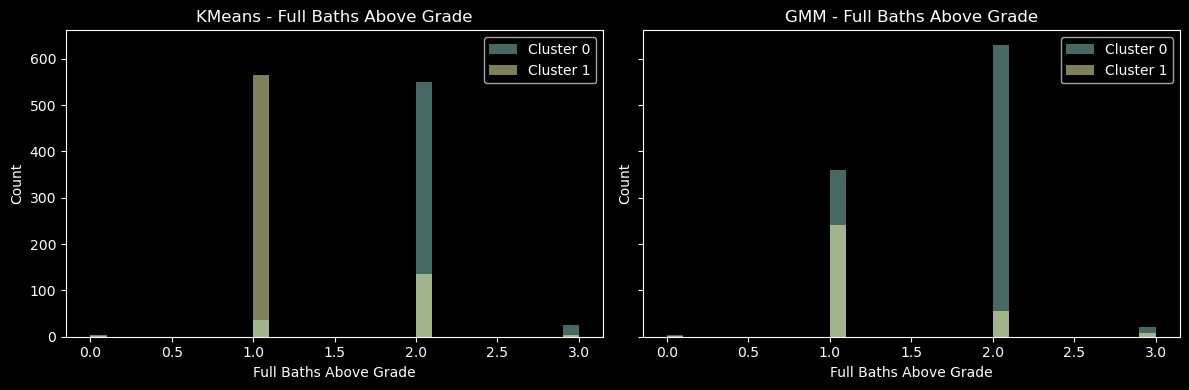

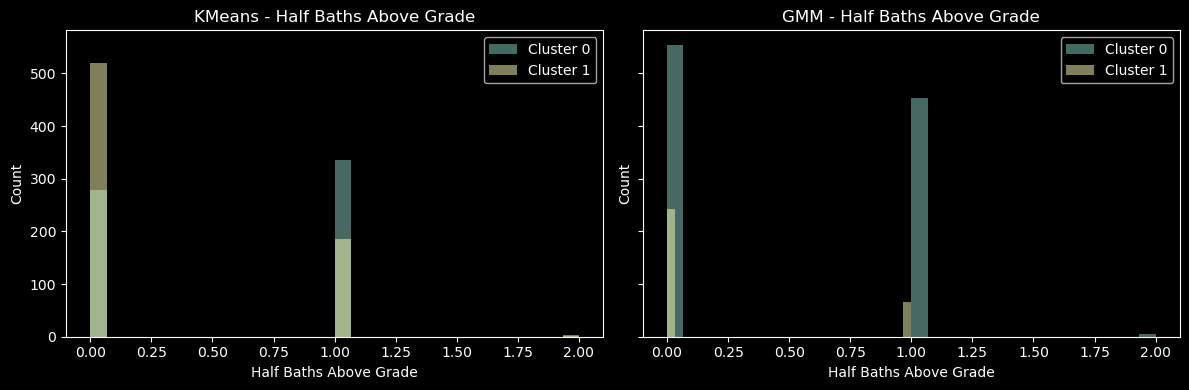

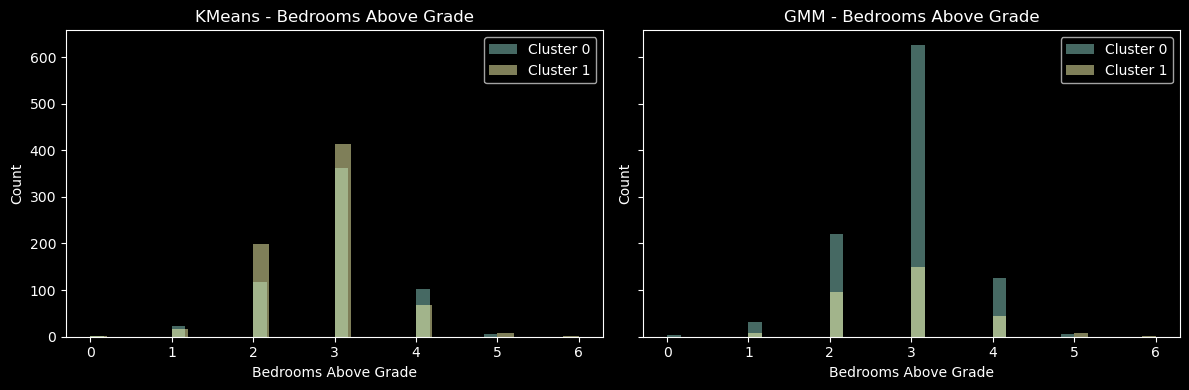

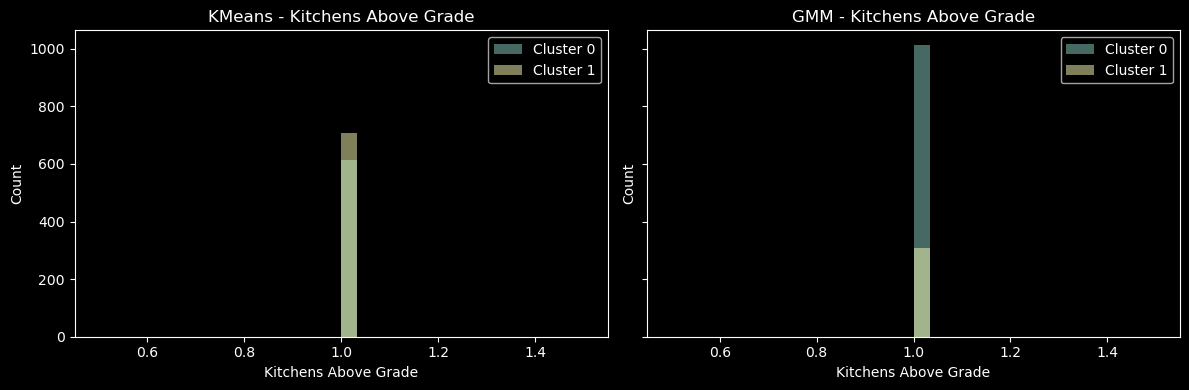

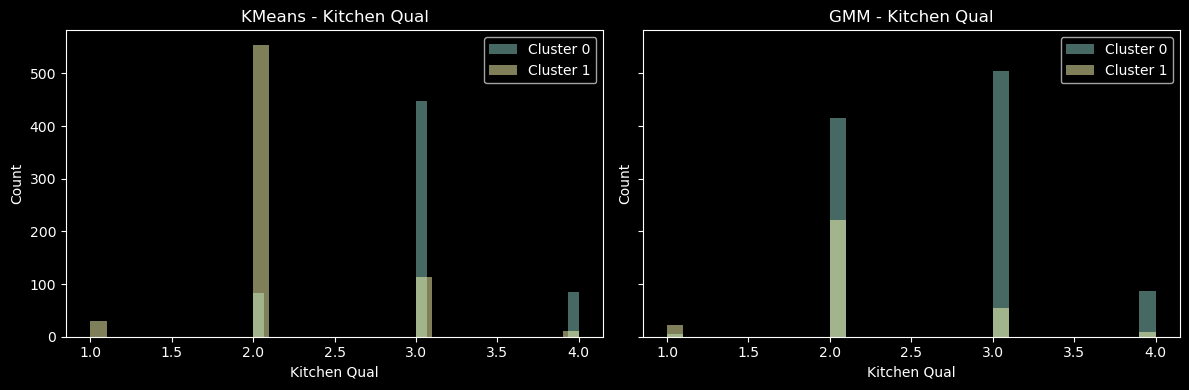

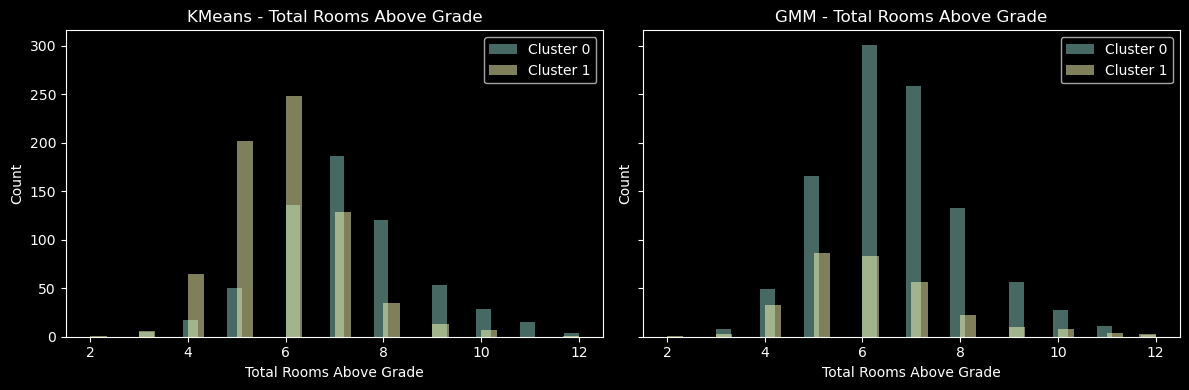

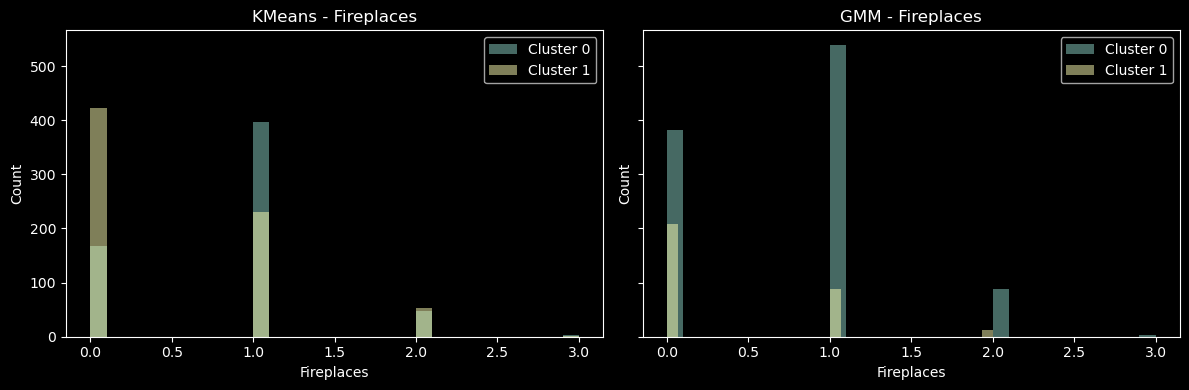

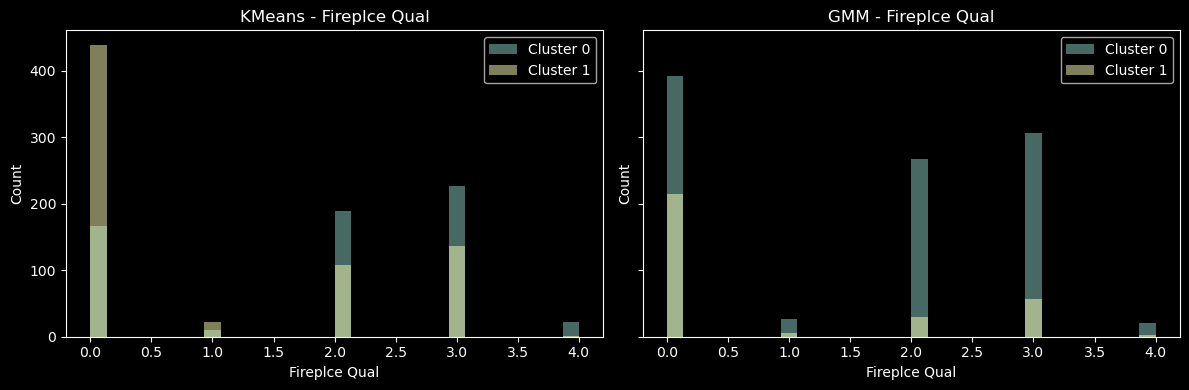

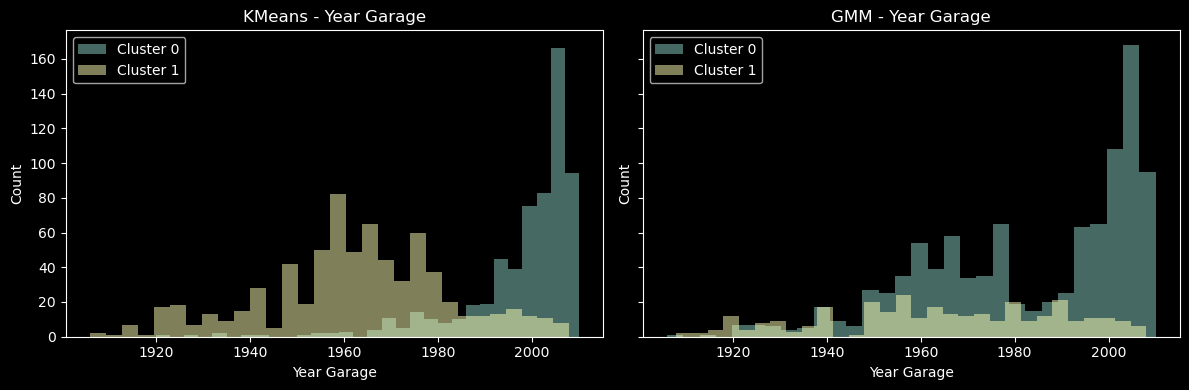

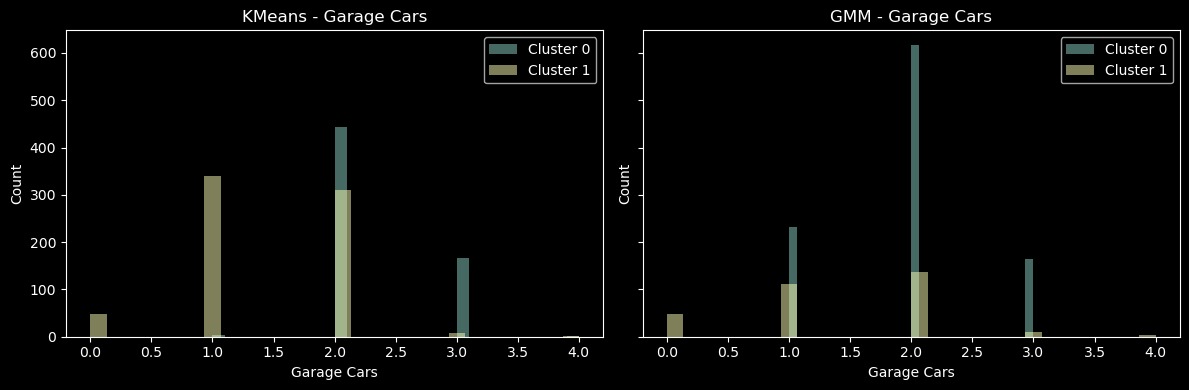

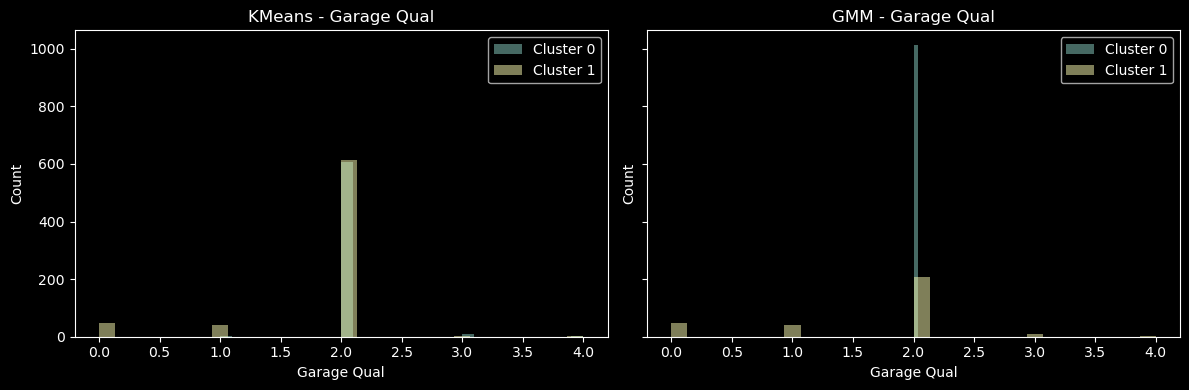

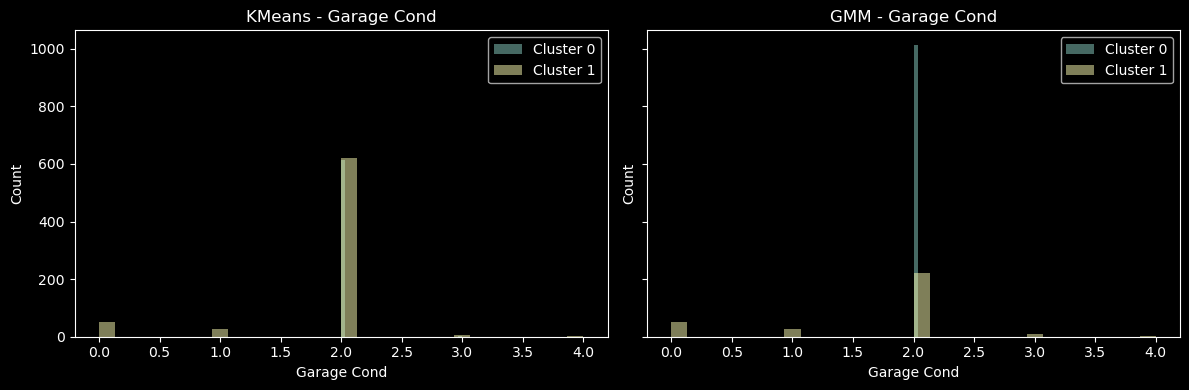

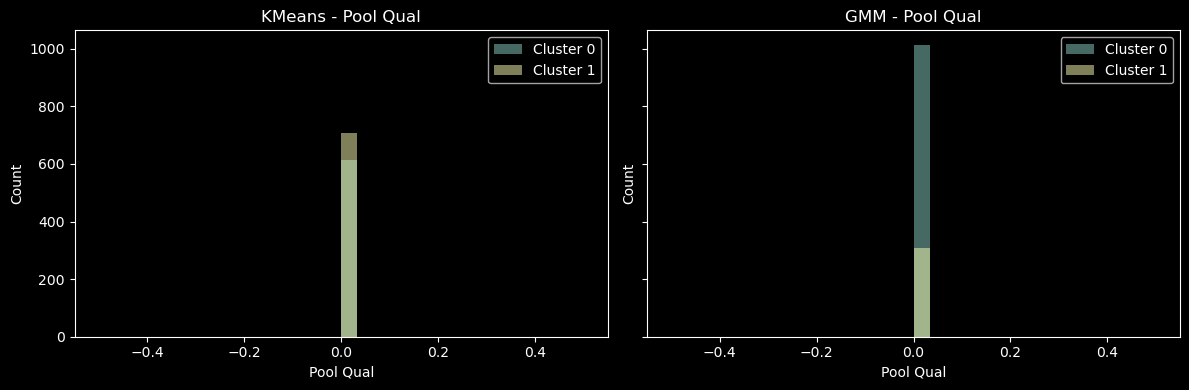

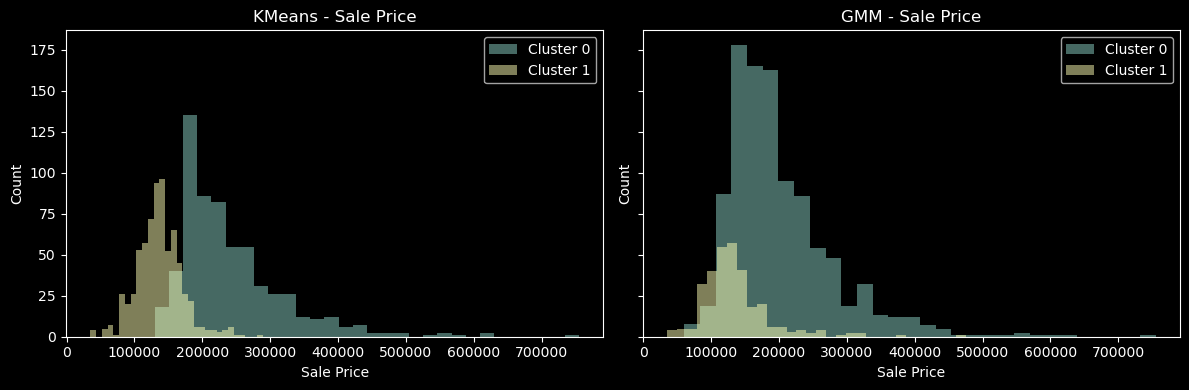

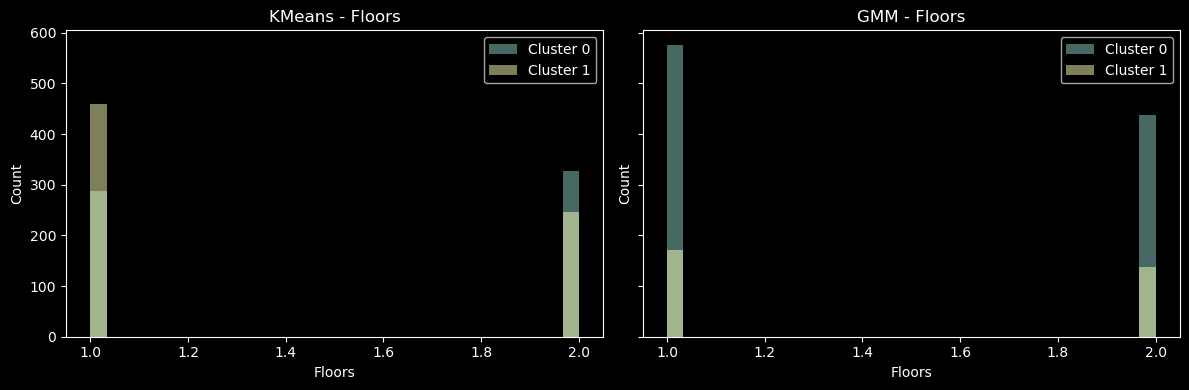

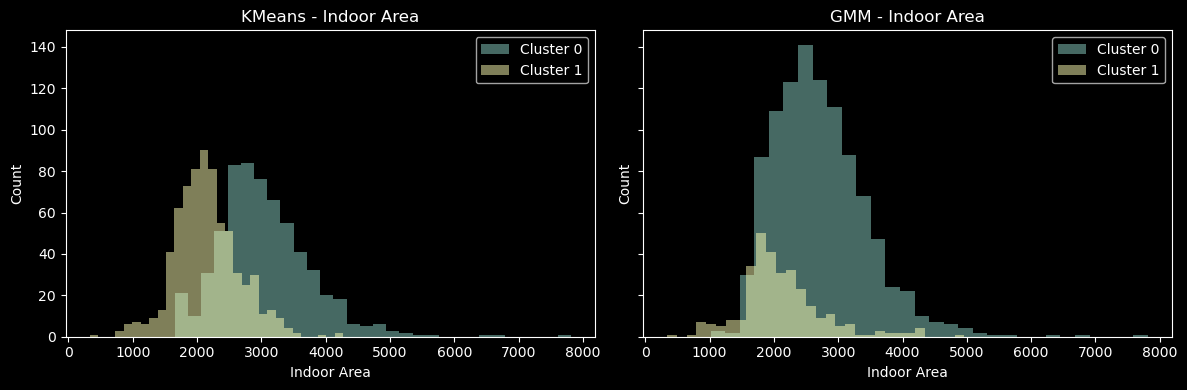

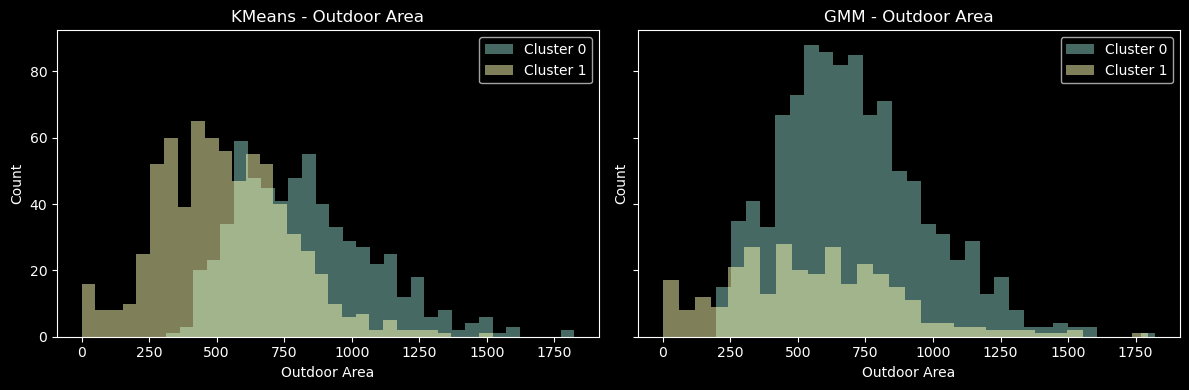

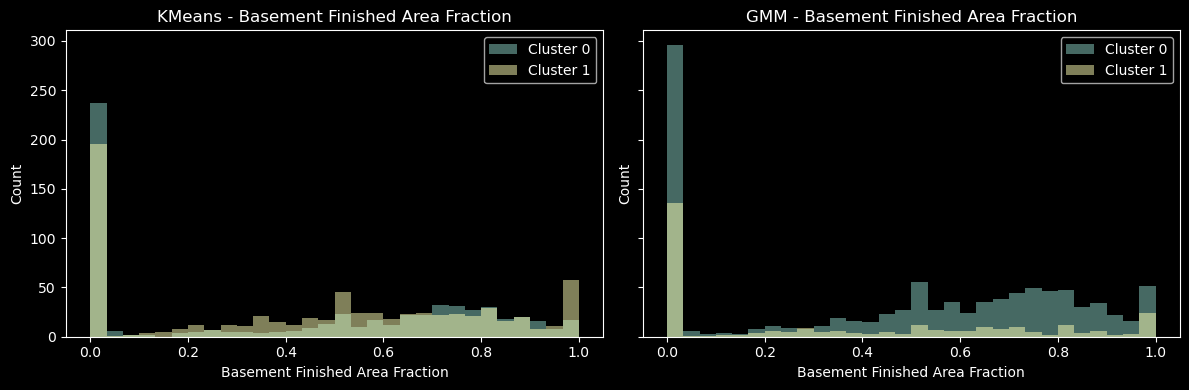

In [32]:
# Loop through each feature
for feature in df_num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    # KMeans plot
    for label in sorted(df_labels['kmeans'].unique()):
        subset = df_num[df_labels['kmeans'] == label][feature]
        axes[0].hist(subset, bins=30, alpha=0.5, label=f'Cluster {label}')
    axes[0].set_title(f'KMeans - {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')
    axes[0].legend()
    
    # GMM plot
    for label in sorted(df_labels['gmm'].unique()):
        subset = df_num[df_labels['gmm'] == label][feature]
        axes[1].hist(subset, bins=30, alpha=0.5, label=f'Cluster {label}')
    axes[1].set_title(f'GMM - {feature}')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Count')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

### Check clustering against categorical feature distributions

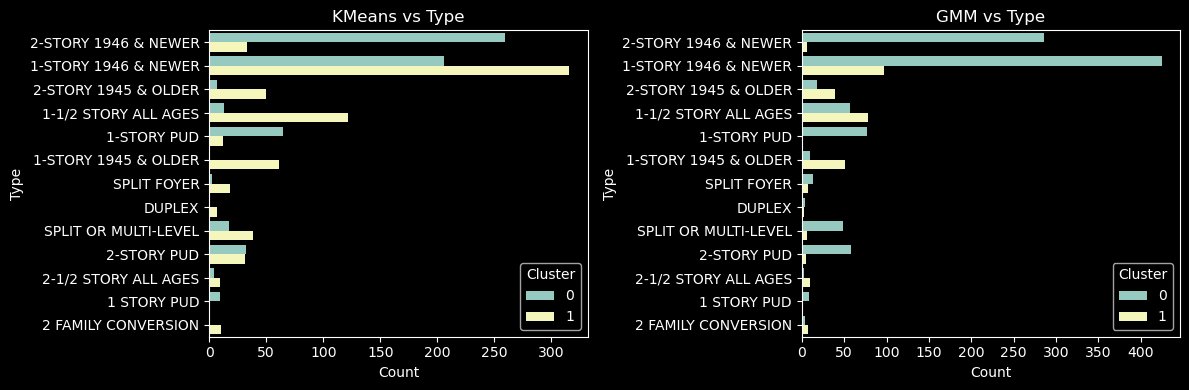

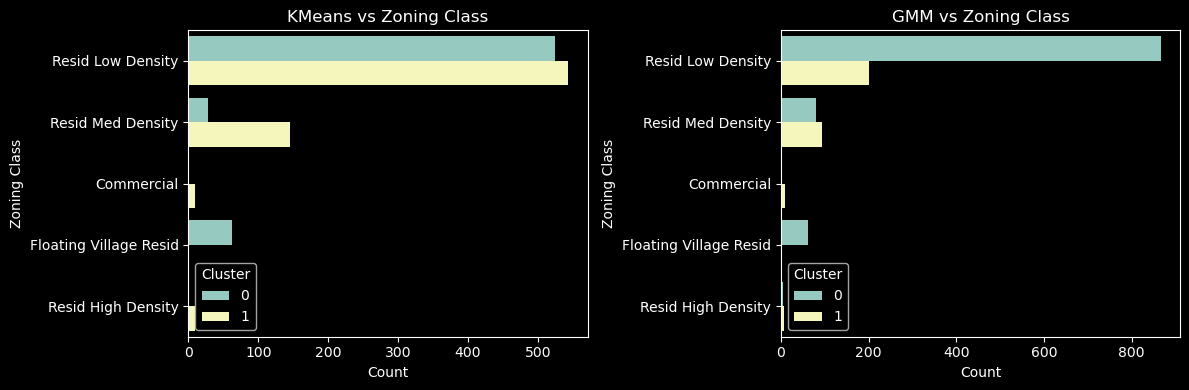

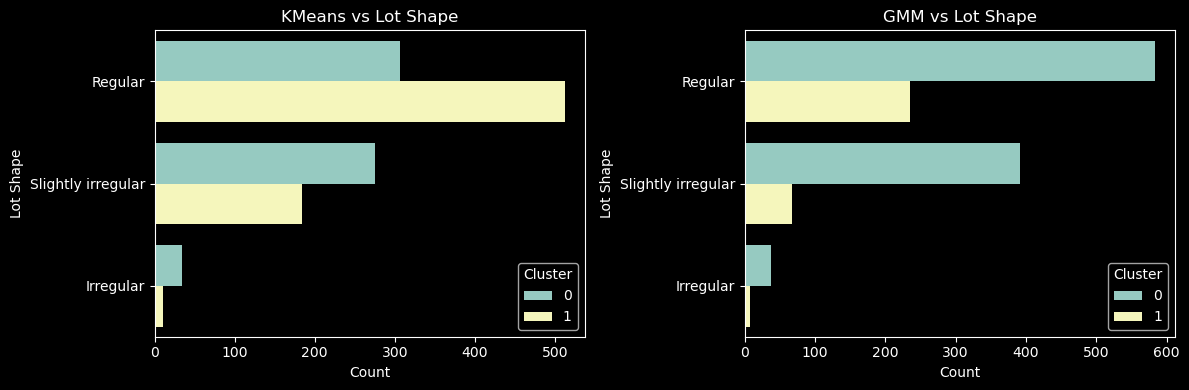

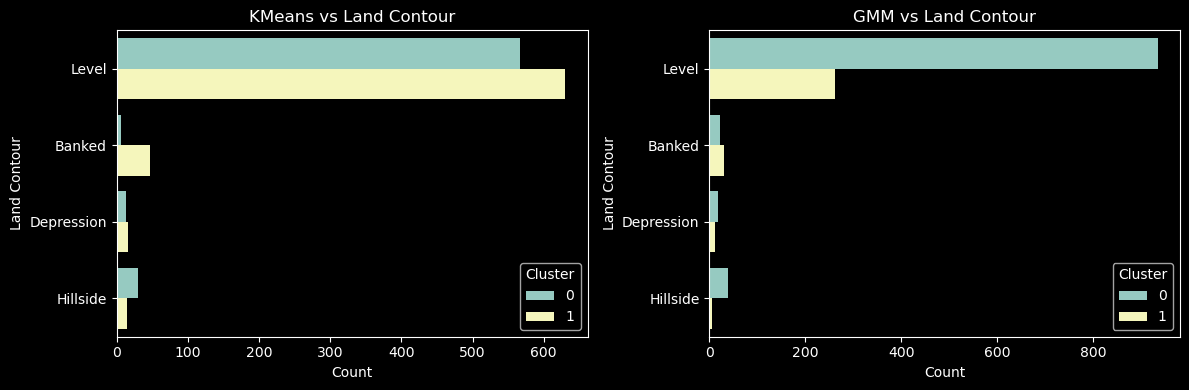

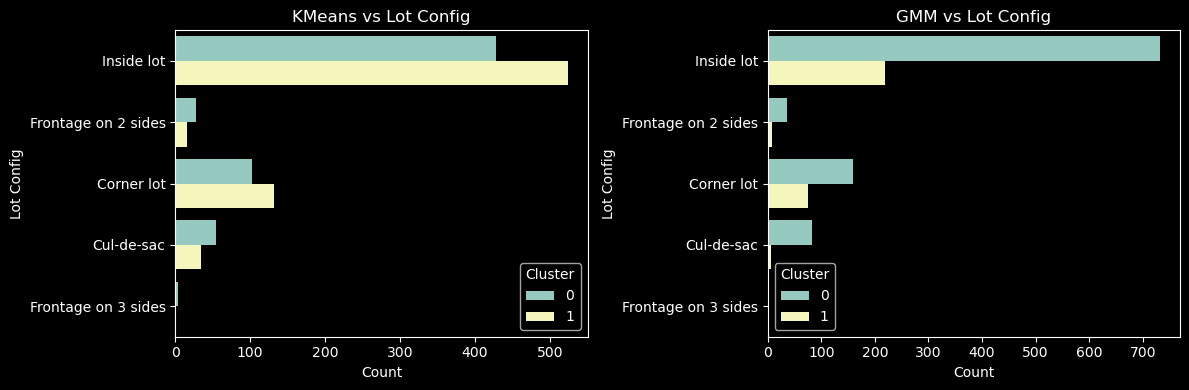

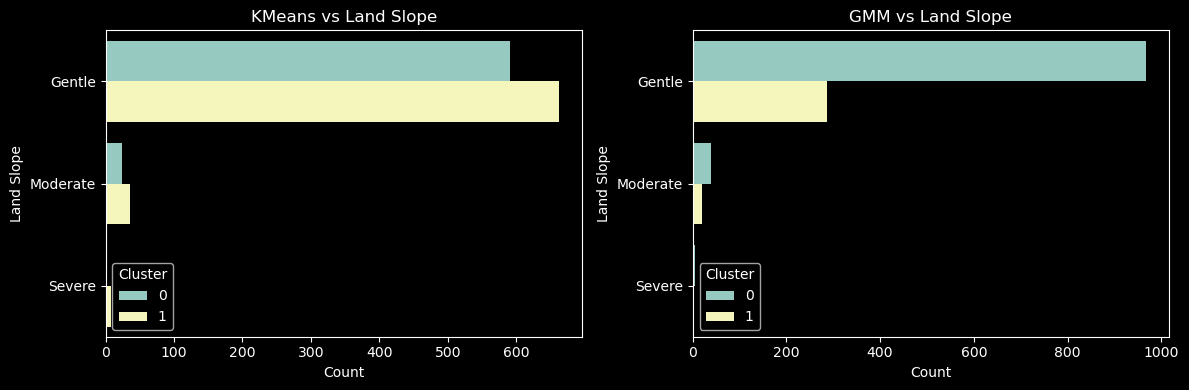

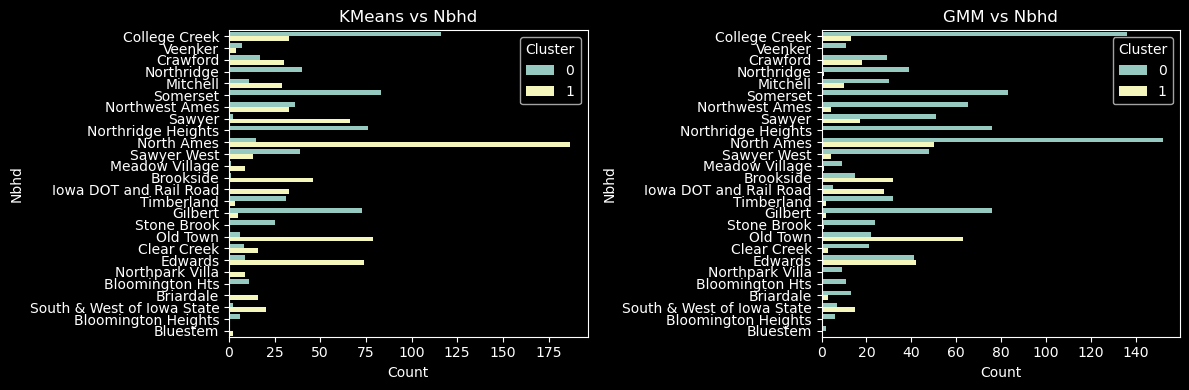

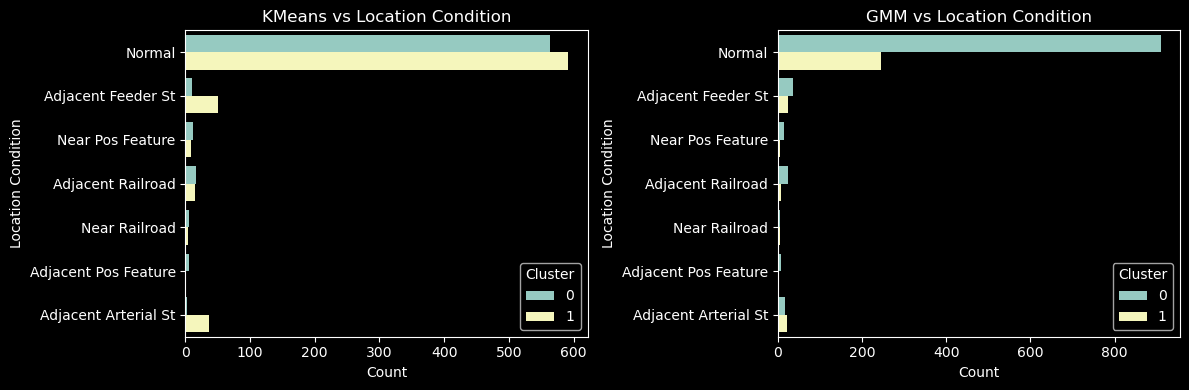

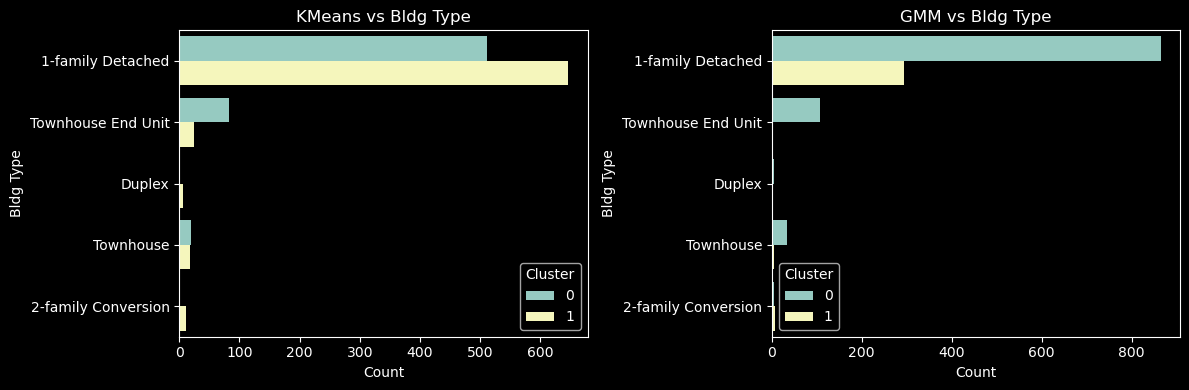

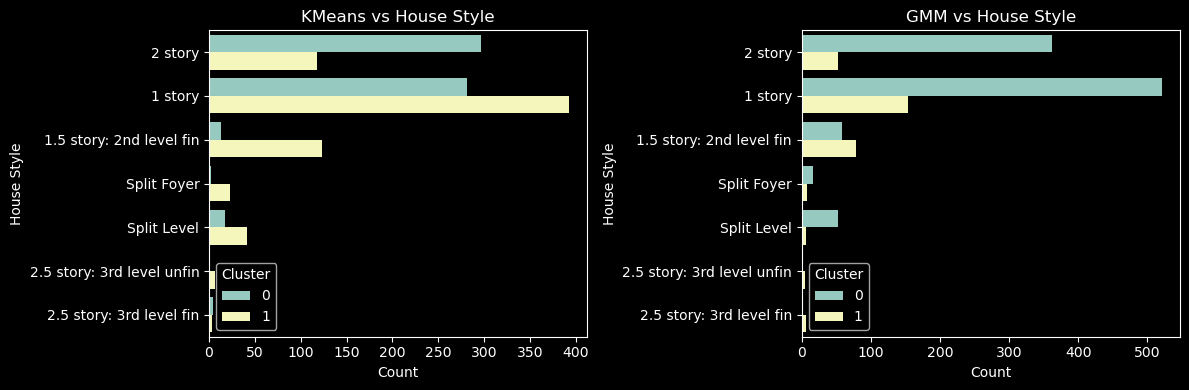

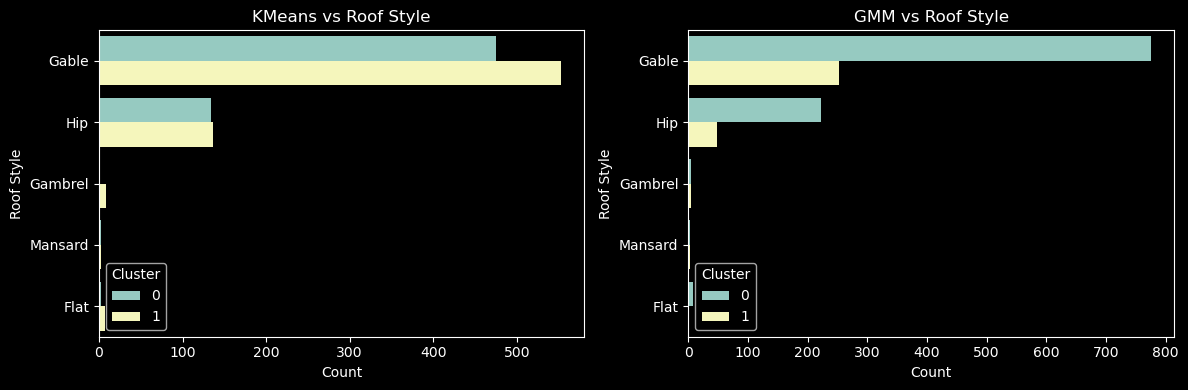

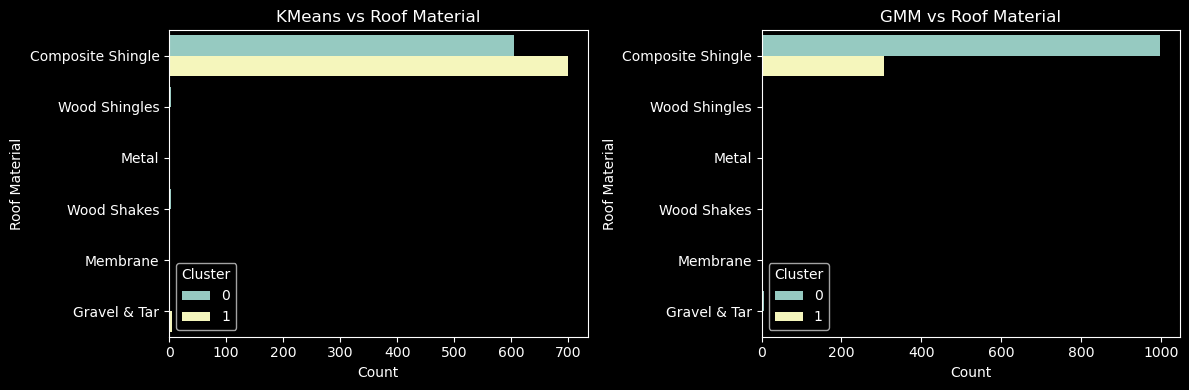

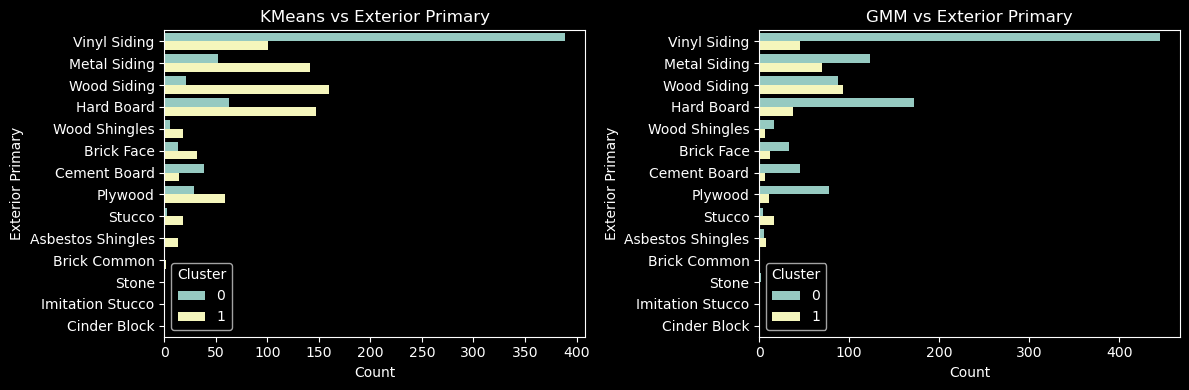

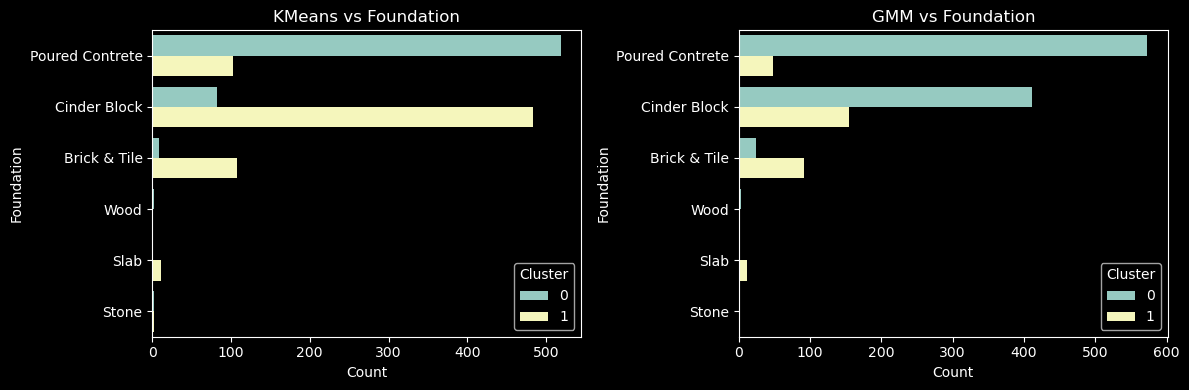

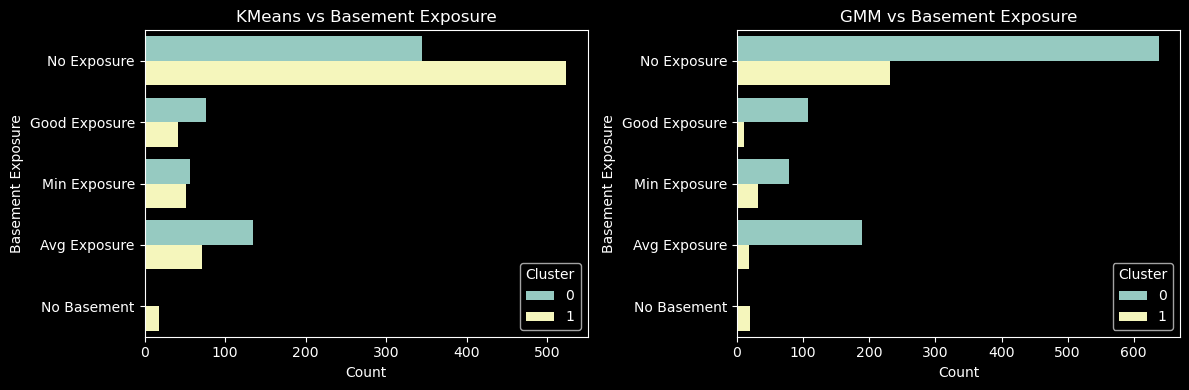

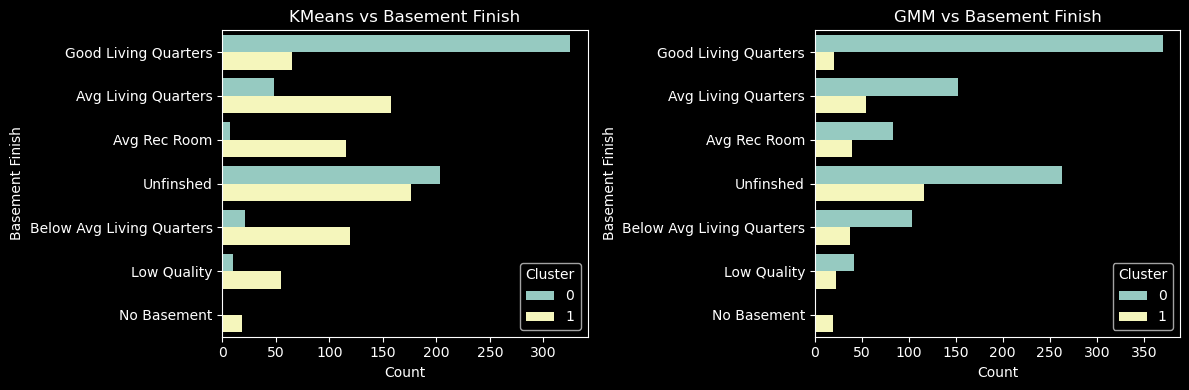

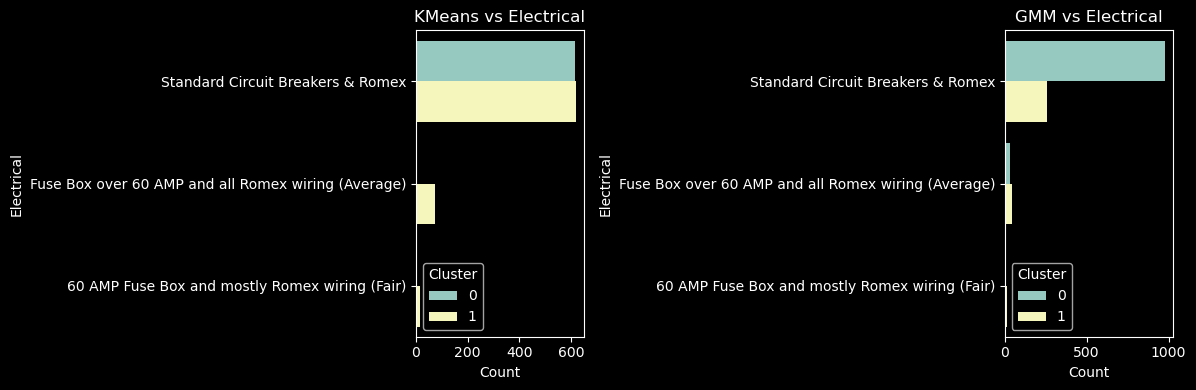

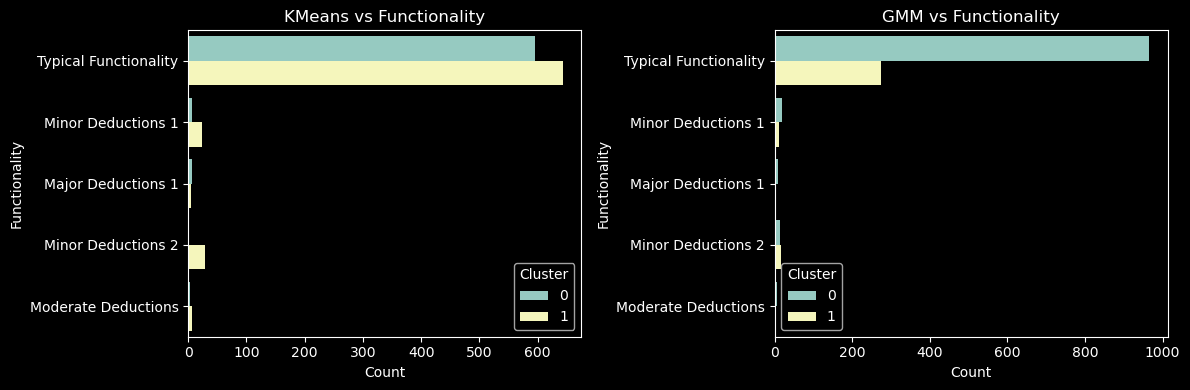

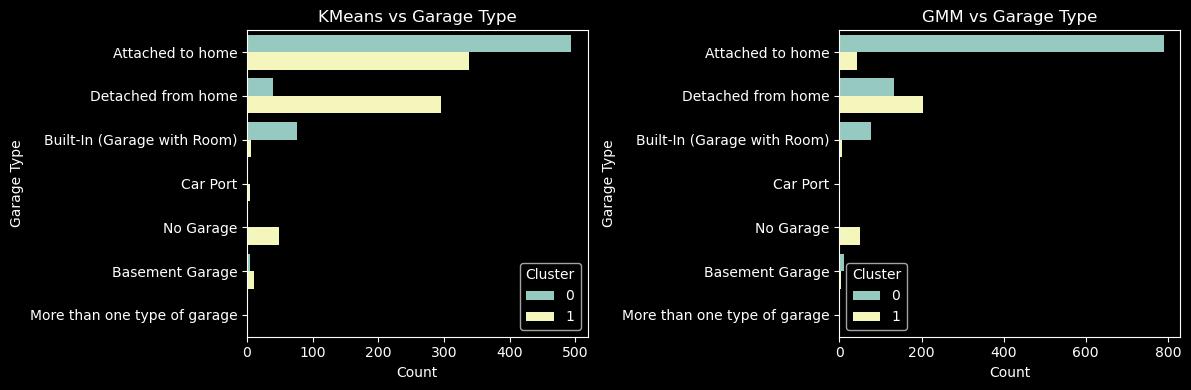

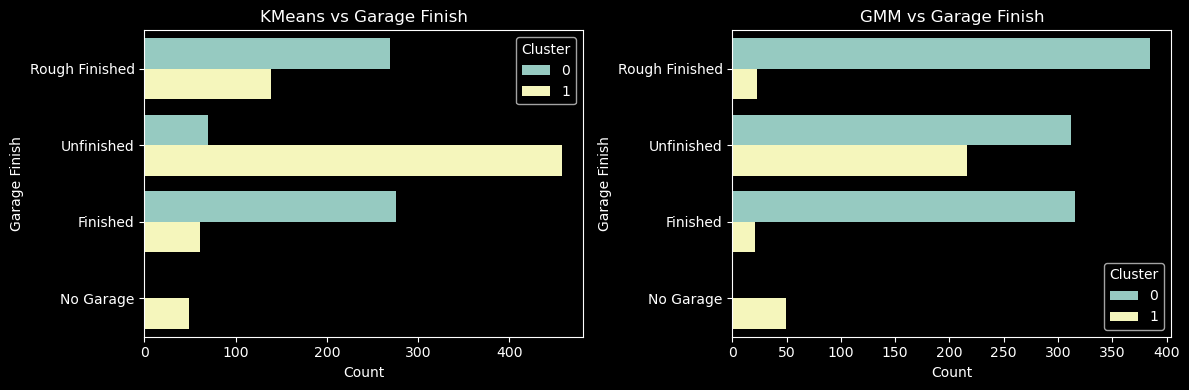

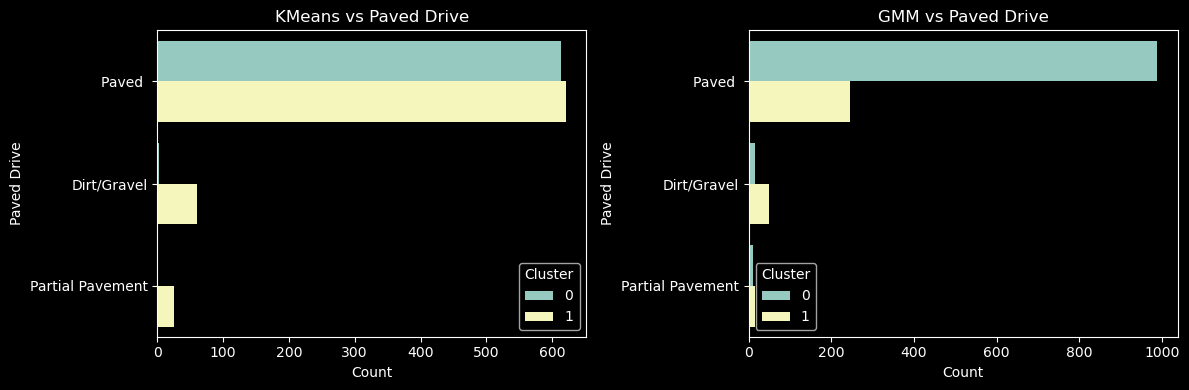

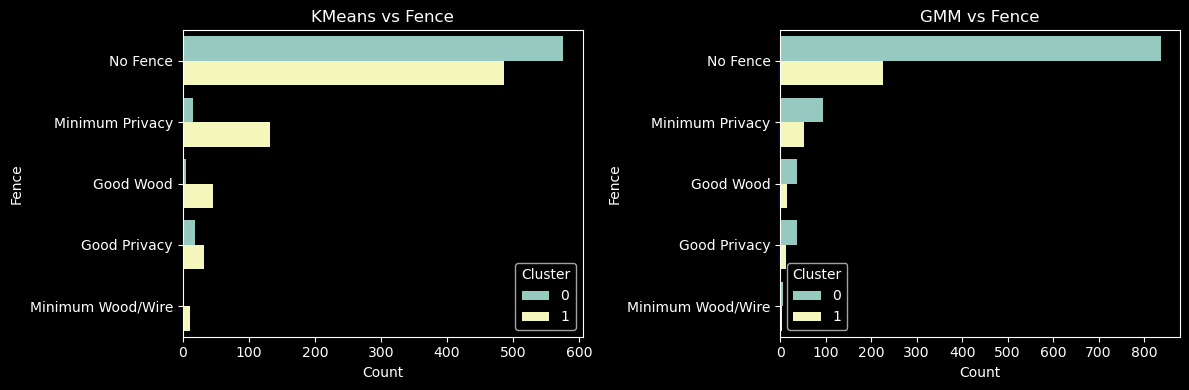

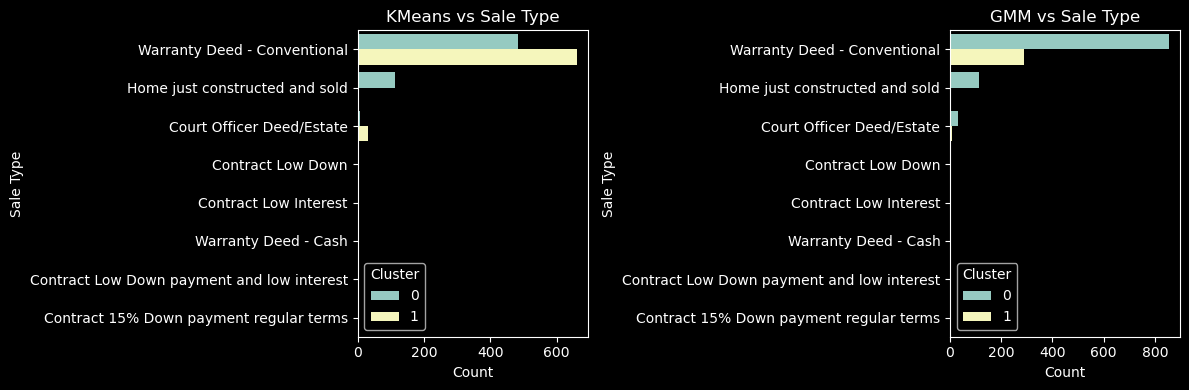

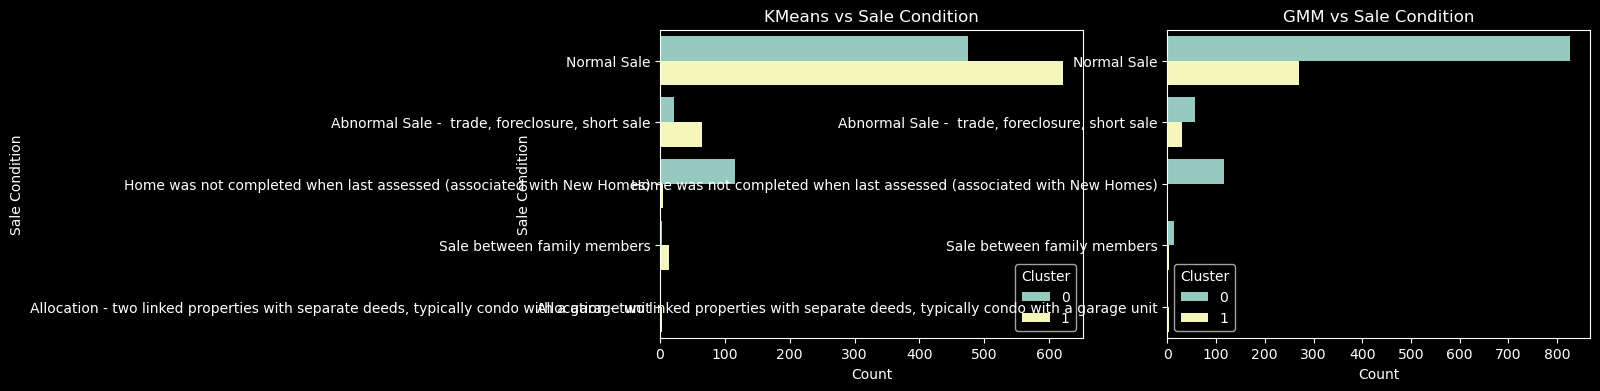

In [25]:
# Attach cluster labels to original DataFrame
df_with_labels = df.copy()
df_with_labels['kmeans'] = labels_kmeans
df_with_labels['gmm'] = labels_gmm

# Get categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # KMeans: count by category and cluster
    sns.countplot(
        data=df_with_labels,
        y=col,
        hue='kmeans',
        ax=axes[0]
    )
    axes[0].set_title(f'KMeans vs {col}')
    axes[0].set_xlabel('Count')
    axes[0].legend(title='Cluster')
    
    # GMM: count by category and cluster
    sns.countplot(
        data=df_with_labels,
        y=col,
        hue='gmm',
        ax=axes[1]
    )
    axes[1].set_title(f'GMM vs {col}')
    axes[1].set_xlabel('Count')
    axes[1].legend(title='Cluster')
    
    plt.tight_layout()
    plt.show()


### t-SNE visualization

t-SNE is a non-linear dimension reduction method that tries to preserves local neighbor relationships in data.

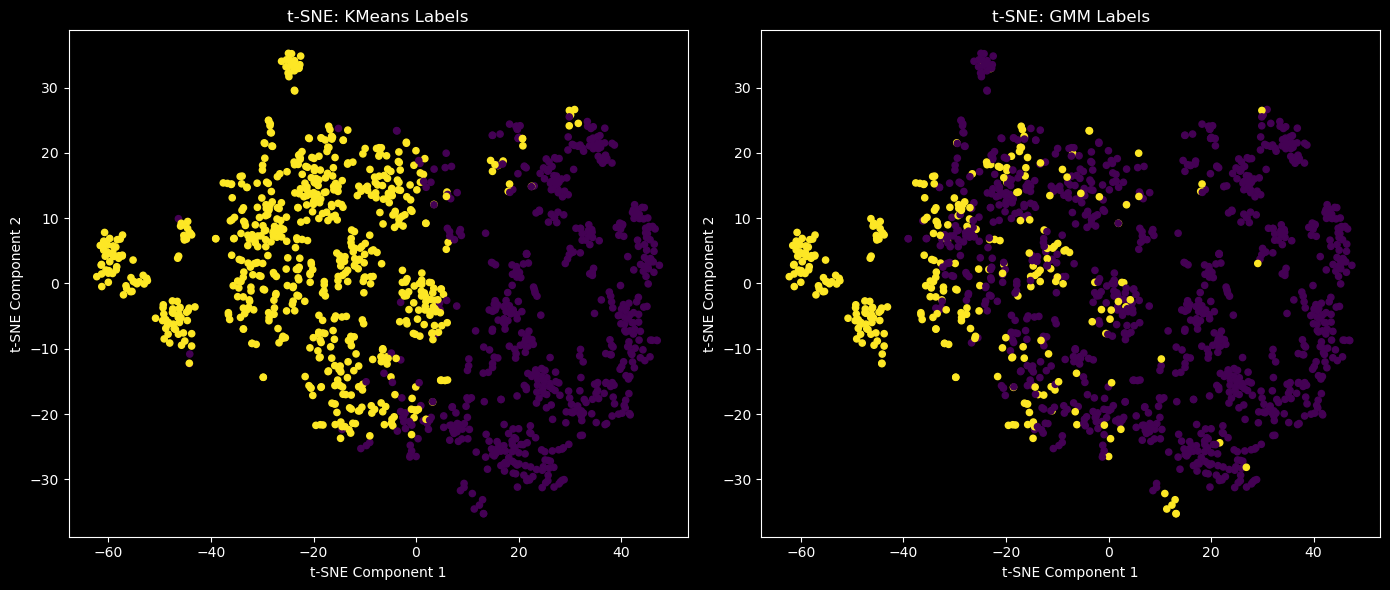

In [26]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
)
X_embedded = tsne.fit_transform(df_num_scaled)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans plot
axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_kmeans, s=20, cmap='viridis')
axes[0].set_title('t-SNE: KMeans Labels')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# GMM plot
axes[1].scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_gmm, s=20, cmap='viridis')
axes[1].set_title('t-SNE: GMM Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

## Agglomerative

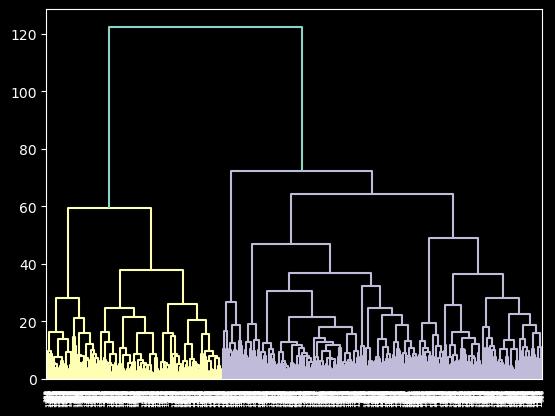

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram

link = linkage(df_num_scaled, method='ward')
#link = linkage(df_num_scaled, method='complete')

dendrogram(link);
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Control
n_clusters = 2

# Agglomerative models using df_num_scaled
model_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_ward = model_ward.fit_predict(df_num_scaled)

model_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels_complete = model_complete.fit_predict(df_num_scaled)

model_average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels_average = model_average.fit_predict(df_num_scaled)

model_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels_single = model_single.fit_predict(df_num_scaled)

# Crosstabs vs KMeans labels with named axes
ct_ward = pd.crosstab(
    index=pd.Series(labels_ward, name='ward'),
    columns=pd.Series(labels_kmeans, name='kmeans'),
    margins=True
)

ct_complete = pd.crosstab(
    index=pd.Series(labels_complete, name='complete'),
    columns=pd.Series(labels_kmeans, name='kmeans'),
    margins=True
)

ct_average = pd.crosstab(
    index=pd.Series(labels_average, name='average'),
    columns=pd.Series(labels_kmeans, name='kmeans'),
    margins=True
)

ct_single = pd.crosstab(
    index=pd.Series(labels_single, name='single'),
    columns=pd.Series(labels_kmeans, name='kmeans'),
    margins=True
)

print("\nWard vs KMeans")
display(ct_ward)

ari = adjusted_rand_score(labels_kmeans, labels_ward)
ami = adjusted_mutual_info_score(labels_kmeans, labels_ward)
print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")
print()

print("\nComplete vs KMeans")
display(ct_complete)

ari = adjusted_rand_score(labels_kmeans, labels_complete)
ami = adjusted_mutual_info_score(labels_kmeans, labels_complete)
print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")
print()

print("\nAverage vs KMeans")
display(ct_average)

ari = adjusted_rand_score(labels_kmeans, labels_average)
ami = adjusted_mutual_info_score(labels_kmeans, labels_average)
print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")
print()

print("\nSingle vs KMeans")
display(ct_single)

ari = adjusted_rand_score(labels_kmeans, labels_single)
ami = adjusted_mutual_info_score(labels_kmeans, labels_single)
print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")


Ward vs KMeans


kmeans,0,1,All
ward,,,
0,148,704,852
1,467,3,470
All,615,707,1322


ARI: 0.595
AMI: 0.565


Complete vs KMeans


kmeans,0,1,All
complete,,,
0,519,707,1226
1,96,0,96
All,615,707,1322


ARI: 0.043
AMI: 0.123


Average vs KMeans


kmeans,0,1,All
average,,,
0,614,707,1321
1,1,0,1
All,615,707,1322


ARI: 0.000
AMI: 0.000


Single vs KMeans


kmeans,0,1,All
single,,,
0,614,707,1321
1,1,0,1
All,615,707,1322


ARI: 0.000
AMI: 0.000


## Spectral clustering

In [43]:
from sklearn.cluster import SpectralClustering

# Control
n_clusters = 2

# Spectral Clustering
model_spectral = SpectralClustering(
    n_clusters=n_clusters,
    affinity='nearest_neighbors',
    n_neighbors=50,
    random_state=42
)
labels_spectral = model_spectral.fit_predict(df_num_scaled)

# Crosstab: Spectral vs KMeans
ct_spectral = pd.crosstab(
    index=pd.Series(labels_spectral, name='spectral'),
    columns=pd.Series(labels_kmeans, name='kmeans'),
    margins=True
)

print("\nSpectral vs KMeans")
display(ct_spectral)

# Agreement scores
ari = adjusted_rand_score(labels_kmeans, labels_spectral)
ami = adjusted_mutual_info_score(labels_kmeans, labels_spectral)
print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")


Spectral vs KMeans


kmeans,0,1,All
spectral,,,
0,573,10,583
1,42,697,739
All,615,707,1322


ARI: 0.849
AMI: 0.770


## Mean Shift

In [49]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate bandwidth
bandwidth = estimate_bandwidth(df_num_scaled, quantile=0.2)
#bandwidth = 8
print(f"Estimated bandwidth: {bandwidth:.3f}")

# MeanShift with estimated bandwidth
model_meanshift = MeanShift(bandwidth=bandwidth)
labels_meanshift = model_meanshift.fit_predict(df_num_scaled)

# Crosstab: MeanShift vs KMeans
ct_meanshift = pd.crosstab(
    index=pd.Series(labels_meanshift, name='meanshift'),
    columns=pd.Series(labels_kmeans, name='kmeans'),
    margins=True
)

print("\nMeanShift vs KMeans")
display(ct_meanshift)

# Agreement scores
ari = adjusted_rand_score(labels_kmeans, labels_meanshift)
ami = adjusted_mutual_info_score(labels_kmeans, labels_meanshift)
print(f"ARI: {ari:.3f}")
print(f"AMI: {ami:.3f}")


Estimated bandwidth: 6.014

MeanShift vs KMeans


kmeans,0,1,All
meanshift,,,
0,577,605,1182
1,8,0,8
2,0,3,3
3,3,0,3
4,0,5,5
5,3,0,3
6,7,0,7
7,1,0,1
8,5,0,5


ARI: -0.005
AMI: 0.090
